In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [2]:
# Dataset 1:

num_samples = 40
np.random.seed(45) 
    
# Generate data
x1 = np.random.uniform(-20, 20, num_samples)
f_x = 100*x1 + 1
eps = np.random.randn(num_samples)
y1 = f_x + eps

# Dataset 2: 

np.random.seed(45)
num_samples = 40
    
# Generate data
x2 = np.random.uniform(-1, 1, num_samples)
f_x = 3*x2 + 4
eps = np.random.randn(num_samples)
y2 = f_x + eps

In [3]:
print(x1.shape)

(40,)


In [4]:
''' 
our model will also be linear y_hat = theta_0 + theta_1*x1
full batch 
loss = (y-y_hat)**2
gradient of loss wrt theta_1 = 2(y-y_hat)*x1
gradient of loss wrt theta_0 = 2(y-y_hat)
initialise theta_0 = 0 and theta_1 = 1 
'''

#Full batch gradient descent
def full_batch_gradient_descent(epochs, learning_rate, theta_0, theta_1, x1, y):
    prev_loss = 0
    diff, loss = [], []
    for i in range(epochs): 

        y_hat = theta_0 + theta_1 * x1
        curr_loss = np.sum((y-y_hat)**2) / len(x1)
        # print(f'Loss is {curr_loss}')
        # print(f'Absolute Difference in previous and current loss {abs(prev_loss - curr_loss)}')

        grad_theta_0 = np.sum(-2*(y - y_hat)) / len(x1)
        grad_theta_1 = np.sum(-2*(y - y_hat)*x1) / len(x1)
        # print(f'grad_Theta_0 is {grad_theta_0} and grad_Theta_1 is {grad_theta_1}')

        theta_0 = theta_0 - learning_rate * grad_theta_0
        theta_1 = theta_1 - learning_rate * grad_theta_1
        # print(f'Theta_0 is {theta_0} and Theta_1 is {theta_1}')

        loss.append(curr_loss)
        diff.append(abs(prev_loss - curr_loss))
        if (abs(prev_loss - curr_loss) < 0.001):
            print(f'Gradient Descent Converged at Epoch {i+1}')
            # break

        prev_loss = curr_loss

    print(f'Theta_0 is {theta_0} and Theta_1 is {theta_1} at epoch {i+1}')
    return diff, loss

In [16]:
'''
model will be linear y_hat[i] = theta_0 + theta_1 * x1[i]
compute loss = (y_hat[i] - y[i])**2
compute gradient of loss wrt theta_0 = -2*(y[i] - y_hat[i])
compute gradient of loss wrt theta_1 = -2*x[i]*(y[i] - y_hat[i])
'''

#Stochastic Gradient Descent
def stochastic_gradient_descent(epochs, learning_rate, theta_0, theta_1, x1, y, y_hat):
    prev_loss= 0
    flag = 0
    diff, loss = [], []
    for i in range(epochs): 
        conv = 0
        for j in range(len(x1)):
            y_hat[j] = theta_0 + theta_1 * x1[j]
            curr_loss = (y[j]-y_hat[j])**2
            # print(f'Loss is {curr_loss}')
            # print(f'Absolute Difference in previous and current loss {abs(prev_loss - curr_loss)}')

            grad_theta_0 = -2*(y[j] - y_hat[j])
            grad_theta_1 = -2*(y[j] - y_hat[j])*x1[j]
            # print(f'grad_Theta_0 is {grad_theta_0} and grad_Theta_1 is {grad_theta_1}')

            theta_0 = theta_0 - learning_rate * grad_theta_0
            theta_1 = theta_1 - learning_rate * grad_theta_1
            # print(f'Theta_0 is {theta_0} and Theta_1 is {theta_1}')

            conv = conv + abs(prev_loss - curr_loss)
            if (abs(prev_loss - curr_loss) < 0.001):
                flag = 1
                print(f'SGD Converged at step {i*len(x1)+j} and epoch {i+1} and iteration {j+1}')
                # break
            # per iteration
            # diff.append(abs(prev_loss - curr_loss))
            # loss.append(curr_loss)
            # per iteration
            prev_loss = curr_loss

        diff.append(conv /  len(x1))
        loss.append(curr_loss)
        
        if flag == 1:
            # print(f'SGD Converged at Epoch {i+1}')
            # break
            pass

    print(f'Theta_0 is {theta_0} and Theta_1 is {theta_1} at Epoch {i+1}')
    return diff, loss

In [36]:
def visualisation(diff , epochs, learning_rate, optimizer, size, ylim): 
    # print(len(diff))
    # print(epochs)

    

    if(optimizer == 'Full Batch Gradient Descent'):
        fig = plt.figure(figsize=(15,5))
        ax = plt.axes()
        diff = diff[ : epochs ]
        ax.plot(range(1, epochs + 1) , diff)
    else:
        fig = plt.figure(figsize=(15,5))
        ax = plt.axes()
        # per iteration
        # diff = diff[ : epochs * size ]
        # ax.plot(range(1, epochs * size + 1) , diff)
        # per iteration
        diff = diff[ : epochs ]
        ax.plot(range(1, epochs + 1) , diff)
    
    

    # ax.xaxis.set_ticks(np.linspace(1, len(diff), len(diff)))
    ax.set_ylim(ylim)
    ax.axhline(y=0.001, color='red', linestyle='--', alpha=0.7)
    if(optimizer == 'Full Batch Gradient Descent'):
        ax.set_xlabel('Epochs')
    else:
        # ax.set_xlabel('Iteration')
        ax.set_xlabel('epochs')
    ax.set_ylabel('Convergence')
    ax.set_title(f'{optimizer} with learning rate {learning_rate} and epochs {epochs}')

def visualisation_loss(loss , epochs, learning_rate, optimizer, size, ylim):
    # print(len(loss))
    # print(epochs)

    if(optimizer == 'Full Batch Gradient Descent'):
        fig = plt.figure(figsize=(15,5))
        ax = plt.axes()
        loss = loss[ : epochs]
        ax.plot(range(1, epochs+1) , loss)
    else:
        fig = plt.figure(figsize=(15,5))
        ax = plt.axes()
        # per iteration
        # loss = loss[ : epochs * size ]
        # ax.plot(range(1, epochs * size + 1) , loss)
        # per iteration
        loss = loss[ : epochs]
        ax.plot(range(1, epochs+1) , loss)
    
    
    # ax.xaxis.set_ticks(np.linspace(1, len(diff), len(diff)))
    ax.set_ylim(ylim)
    ax.axhline(y=0, color='red', linestyle='--', alpha=0.7)
    if(optimizer == 'Full Batch Gradient Descent'):
        ax.set_xlabel('Epochs')
    else:
        ax.set_xlabel('epochs')
        # ax.set_xlabel('Iteration')
    ax.set_ylabel('Loss')
    ax.set_title(f'{optimizer} with learning rate {learning_rate} and epochs {epochs}')
    
    

Full batch gradient descent converged at no of steps for dataset 1:
Gradient Descent Converged at Epoch 768
Gradient Descent Converged at Epoch 769
Gradient Descent Converged at Epoch 770
Theta_0 is 0.4434164276300821 and Theta_1 is 99.97726916519295 at epoch 770
Full batch gradient descent converged at no of steps for dataset 2:
Gradient Descent Converged at Epoch 43
Gradient Descent Converged at Epoch 44
Gradient Descent Converged at Epoch 45
Gradient Descent Converged at Epoch 46
Gradient Descent Converged at Epoch 47
Gradient Descent Converged at Epoch 48
Gradient Descent Converged at Epoch 49
Gradient Descent Converged at Epoch 50
Theta_0 is 3.9395436816295515 and Theta_1 is 2.5913167125852485 at epoch 50


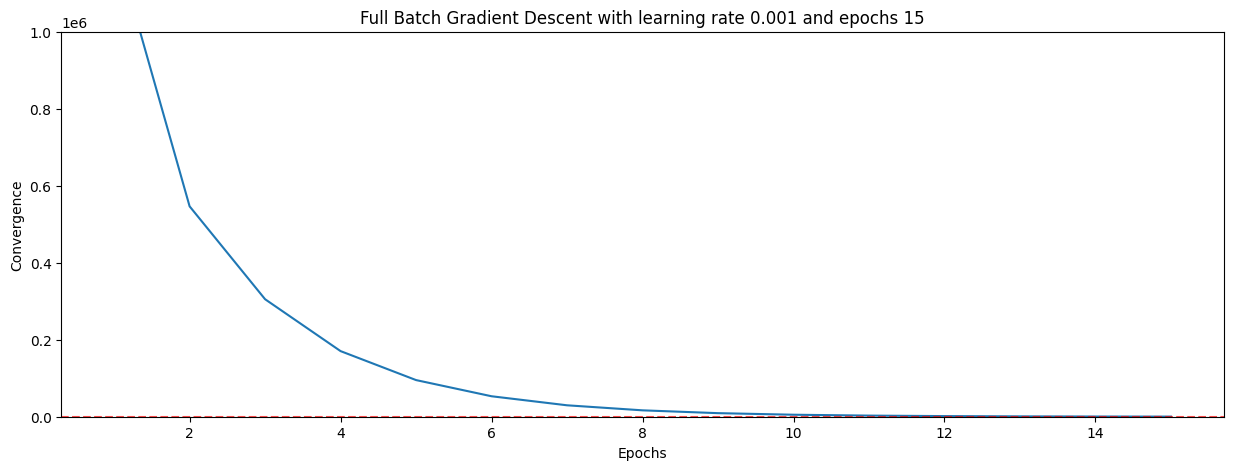

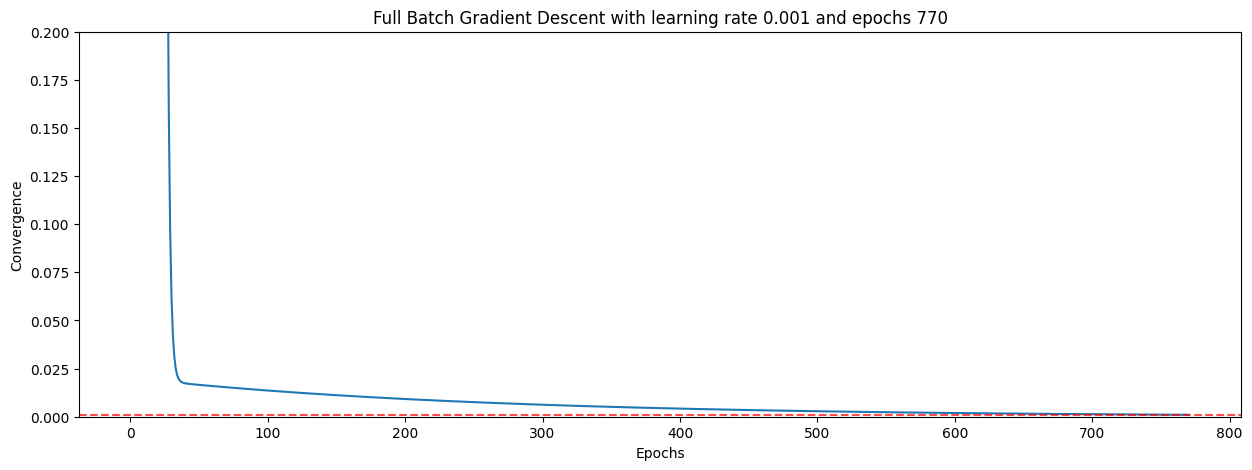

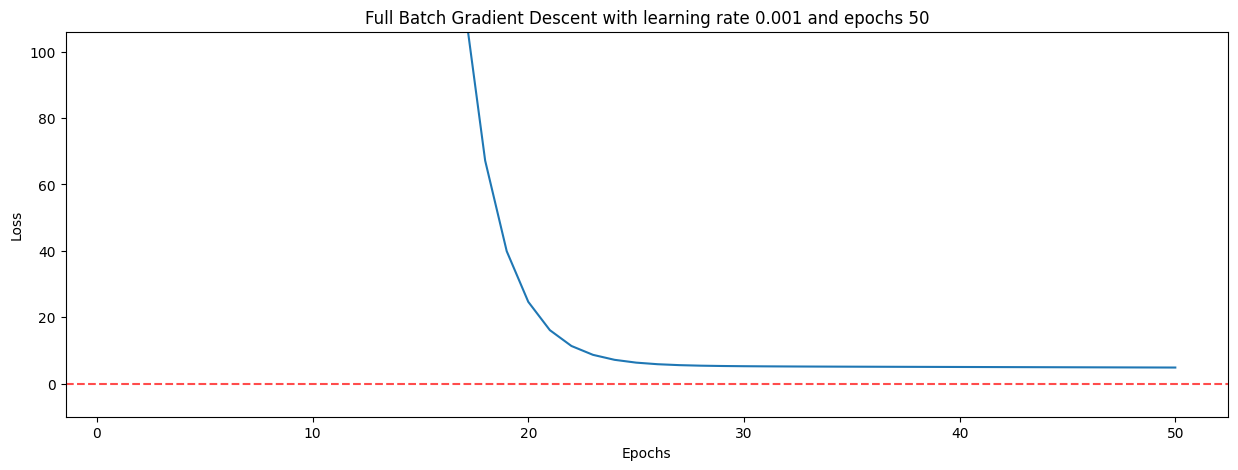

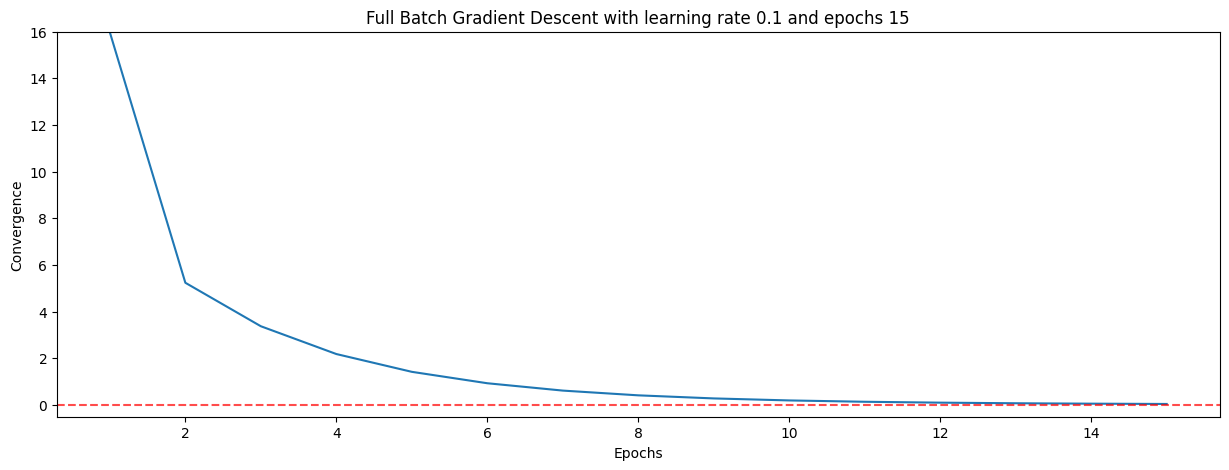

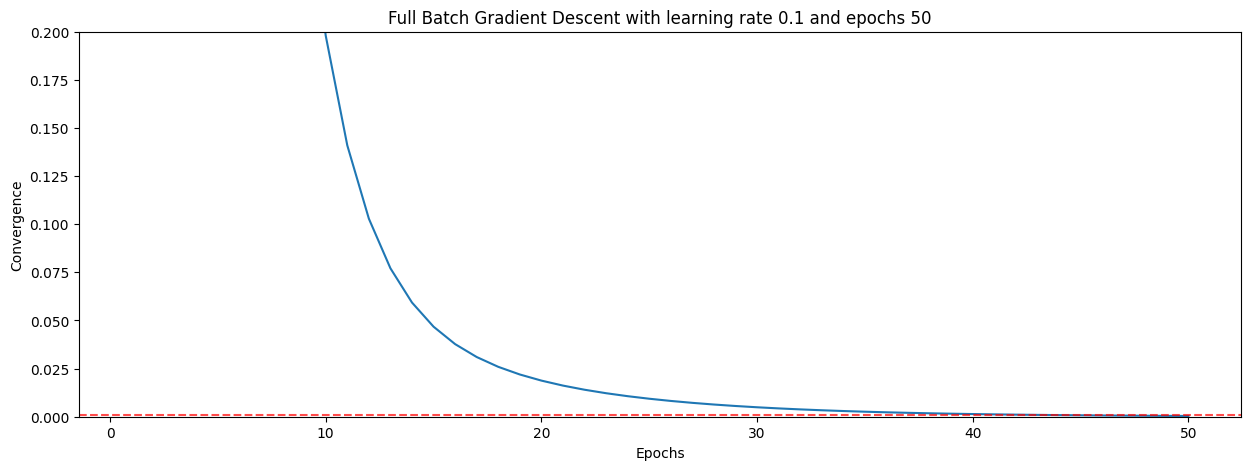

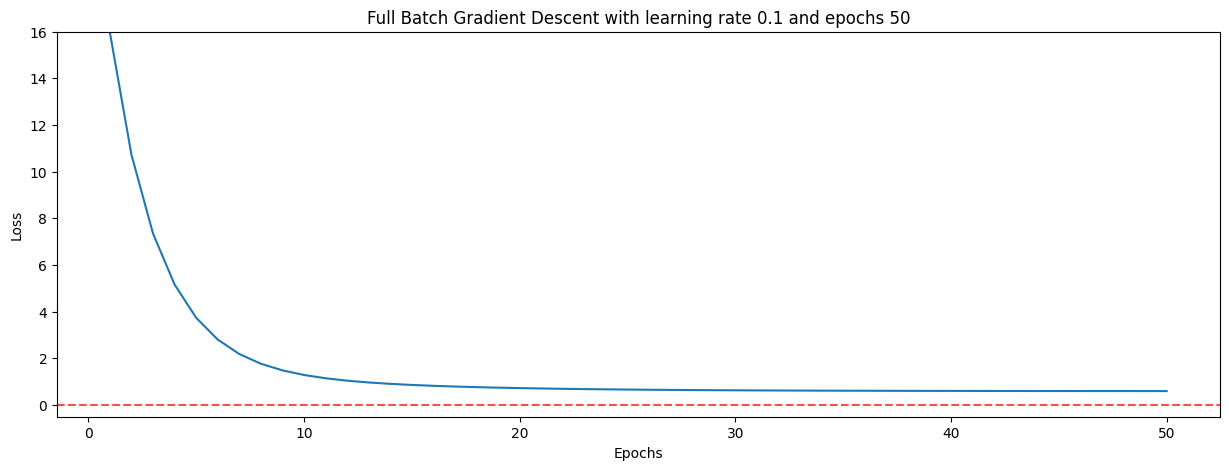

In [18]:
# Full Batch Gradient Descent for dataset 1
''' at learning_rate = 0.5, 0.1, 0.01 current_loss > previous_loss in subsequent iterations,
 at learning_rate = 0.001 current loss is not greater than previous loss '''

print('Full batch gradient descent converged at no of steps for dataset 1:')
diff, loss = full_batch_gradient_descent(770, 0.001, 0, 1, x1, y1)

# visualize convergence process for 15 epochs
ylim = [-10, 1e6]
visualisation(diff, 15, 0.001,'Full Batch Gradient Descent', len(x1), ylim)

# visualize convergence process for 770 epochs
ylim = [0, 0.2]
visualisation(diff, 770, 0.001,'Full Batch Gradient Descent', len(x1), ylim)

# visualize loss v/s epochs
ylim = [-10, 106]
visualisation_loss(loss, 50, 0.001,'Full Batch Gradient Descent', len(x1), ylim)

# Full Batch Gradient Descent for dataset 2
''' increased epochs from 15 to 50 so that convergence occurr for learning_rate 0.1. 4
If learning_rate is small then convergence is slower and if learning-rate is large convergence is far'''

print('Full batch gradient descent converged at no of steps for dataset 2:')
diff, loss = full_batch_gradient_descent(50, 0.1, 0, 1, x2, y2)

# visualize convergence process for 15 epochs
ylim = [-0.5, 16]
visualisation(diff, 15, 0.1,'Full Batch Gradient Descent', len(x2), ylim)

# visualize convergence process for 50 epochs
ylim = [0, 0.2]
visualisation(diff, 50, 0.1,'Full Batch Gradient Descent', len(x2), ylim)

# visualize loss v/s epochs
ylim = [-0.5, 16]
visualisation_loss(loss, 50, 0.1,'Full Batch Gradient Descent', len(x2), ylim)


Dataset 1
SGD Converged at step 1113 and epoch 28 and iteration 34
Theta_0 is 1.1051418132378905 and Theta_1 is 99.9699101553176 at Epoch 30
Dataset 2
SGD Converged at step 73 and epoch 2 and iteration 34
Theta_0 is 4.331508623359805 and Theta_1 is 2.7253887806421684 at Epoch 2


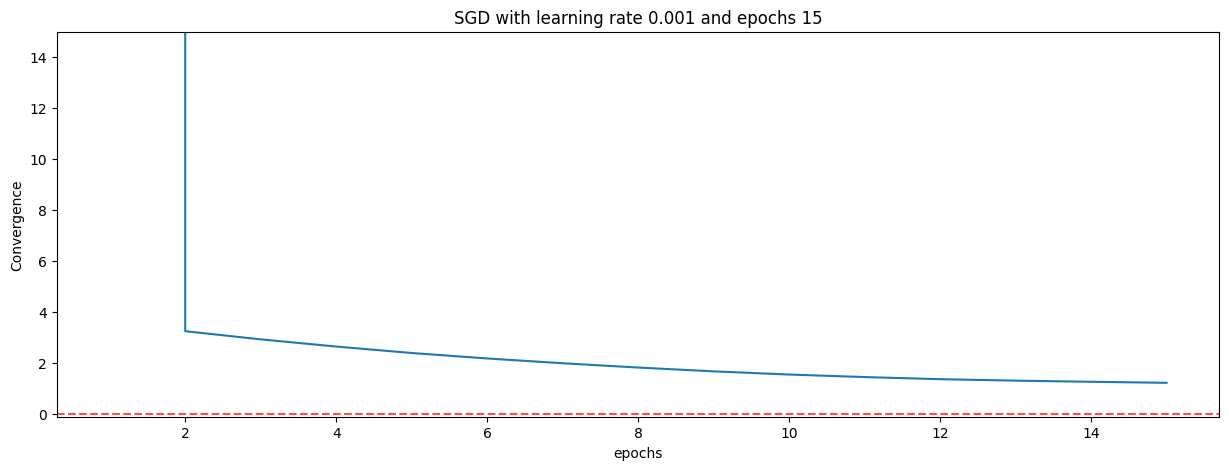

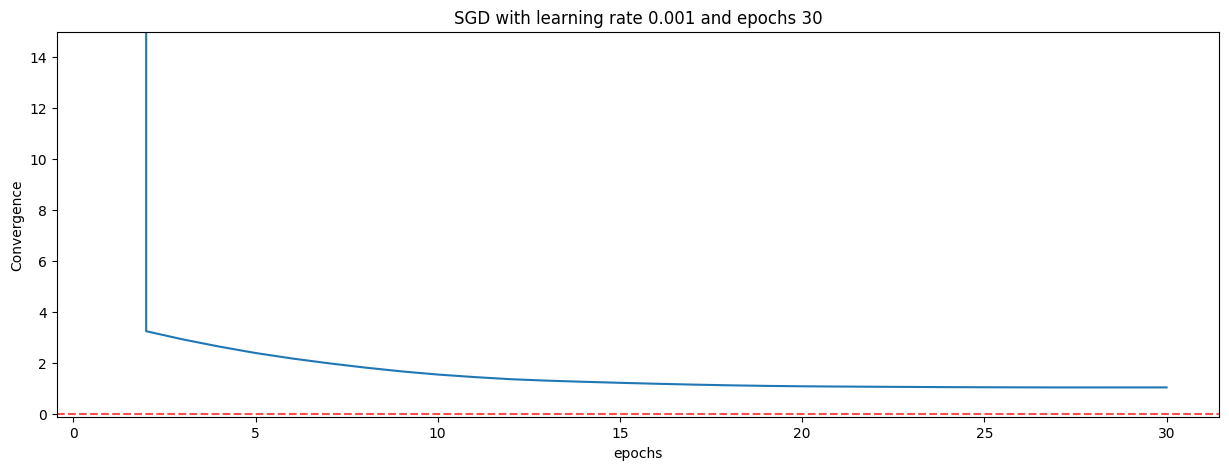

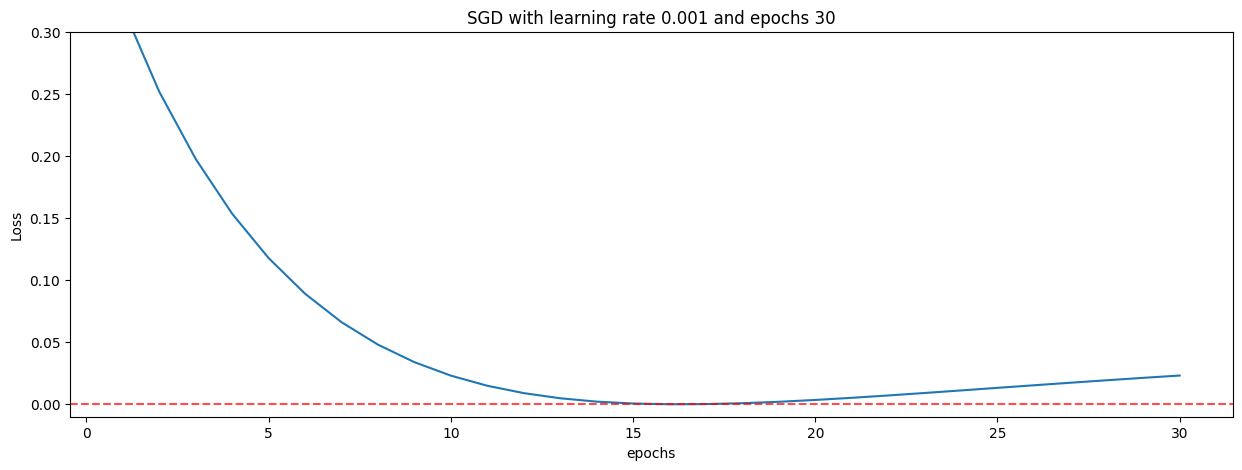

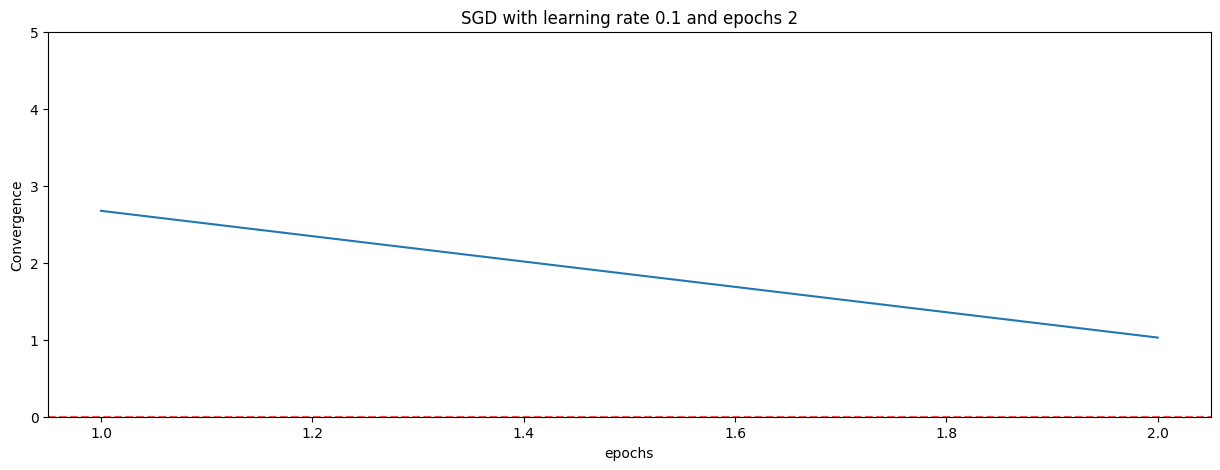

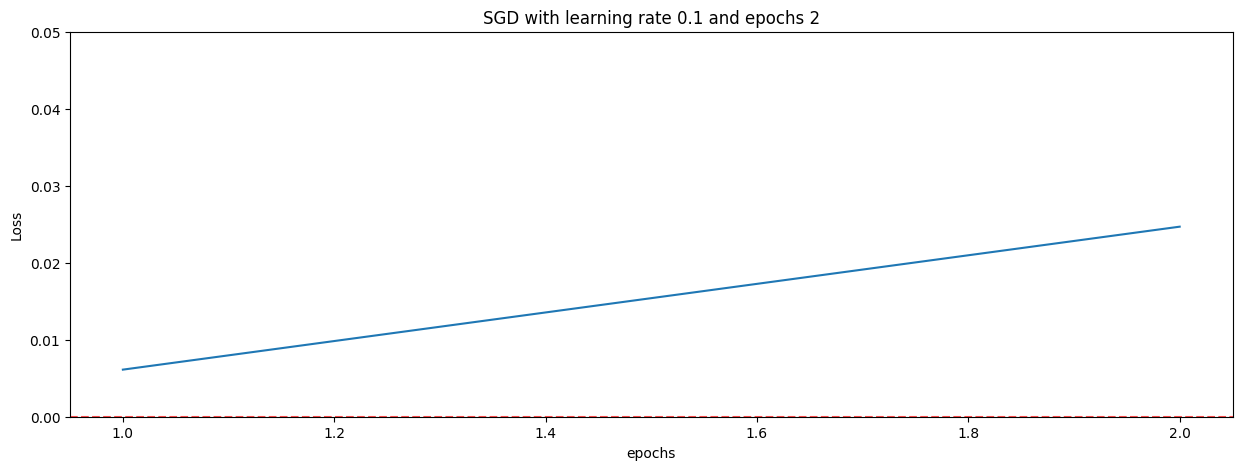

In [37]:
#Stochastic Gradient Descent for dataset 1
y_hat = np.zeros(len(x1))
print('Dataset 1')
diff, loss = stochastic_gradient_descent(30, 0.001, 0, 1, x1, y1, y_hat)

# visualize convergence process for 15 epochs
# per iteration
# ylim = [-1, 50]
# per iteration
ylim = [-0.1, 15]
visualisation(diff, 15, 0.001, 'SGD', len(x1), ylim)

# visualize convergence process for 30 epochs
# per iteration
# ylim = [-1, 50]
# per iteration
ylim = [-0.1, 15]
visualisation(diff, 30, 0.001, 'SGD', len(x1), ylim)

# visualize loss v/s epochs
# per iteration
# ylim = [-1, 50]
# per iteration
ylim = [-0.01, 0.3]
visualisation_loss(loss, 30, 0.001,'SGD', len(x1), ylim)

#Stochastic Gradient Descent for dataset 2
y_hat = np.zeros(len(x2))
print('Dataset 2')
diff,loss = stochastic_gradient_descent(2, 0.1, 0, 1, x2, y2, y_hat)

# visualize convergence process for 15 epochs
# per iteration
# ylim = [-1, 20]
# per iteration
ylim = [0, 5]
visualisation(diff, 2, 0.1, 'SGD', len(x2), ylim)

# # visualize loss v/s epochs
# per iteration
# ylim = [-1, 20]
# per iteration
ylim = [0, 0.05]
visualisation_loss(loss, 2, 0.1,'SGD', len(x2), ylim)

In [59]:
def contour_plot_full_batch(X, y, t0lim, t1lim, theta_0, theta_1, epochs, learning_rate, momentum, beta = 0):   

    t0 = np.linspace(t0lim[0], t0lim[1], 5)
    t1 = np.linspace(t1lim[0], t1lim[1], 5)
    t0, t1 = np.meshgrid(t0, t1)
    x_flat = X[np.newaxis, np.newaxis, : ]
    broadcasted_t1 = t1[:, : ,np.newaxis]
    broadcasted_t0 = t0[:, : ,np.newaxis]
    y_hat = broadcasted_t0 + broadcasted_t1 * x_flat
    y_flat = y[np.newaxis, np.newaxis, : ]
    z = np.mean((y_flat - y_hat)**2, axis = -1)
    
    fig, ax = plt.subplots()
    # ax.scatter(theta_0,theta_1, color = 'black', marker = '.')
    contour = ax.contourf(t0, t1, z, levels = 10)
    ax.set_xlabel('Theta 0')
    ax.set_ylabel('Theta 1')
    ax.set_title(f'Contour plot: learning rate {learning_rate} , epochs: {epochs}')
    plt.colorbar(contour)

    m, n = [], []
    history_0, history_1 = 0, 0

    def animate(frames):
        nonlocal theta_0, theta_1, history_0, history_1

        m.append(theta_0)
        n.append(theta_1)
        # print(f' Theta_0: {theta_0}, Theta_1: {theta_1}')
        sc = ax.plot(m, n, color = 'red', marker = '.')

        y_pred = theta_0 + theta_1 * X

        grad_theta_0 = np.sum(-2*(y - y_pred)) / len(X)
        grad_theta_1 = np.sum(-2*(y - y_pred)*X) / len(X)
        ax.set_title(f'Contour plot: lr: {learning_rate} , epochs: {epochs}, ({theta_0:.2f},{theta_1:.2f}), Gradients: ({grad_theta_0:.2f}, {grad_theta_1:.2f})')

        if momentum == True:
            history_0 = beta * history_0 + grad_theta_0
            history_1 = beta * history_1 + grad_theta_1
            theta_0 = theta_0 - learning_rate * history_0
            theta_1 = theta_1 - learning_rate * history_1
        else:
            theta_0 = theta_0 - learning_rate * grad_theta_0
            theta_1 = theta_1 - learning_rate * grad_theta_1

        return (sc, )

    num_frames = epochs

    animation = FuncAnimation(fig, animate, frames=num_frames, interval=500)  
    return animation 

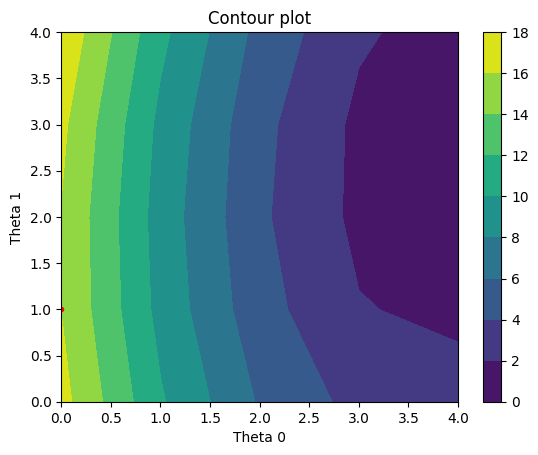

In [93]:
#Full batch dataset 2 with 1000 epochs 
theta_0, theta_1, epochs, learning_rate = 0, 1, 1000, 0.001
t0lim = [0,4]
t1lim = [0,4]
animation = contour_plot_full_batch(x2, y2, t0lim, t1lim, theta_0, theta_1, epochs, learning_rate, False)



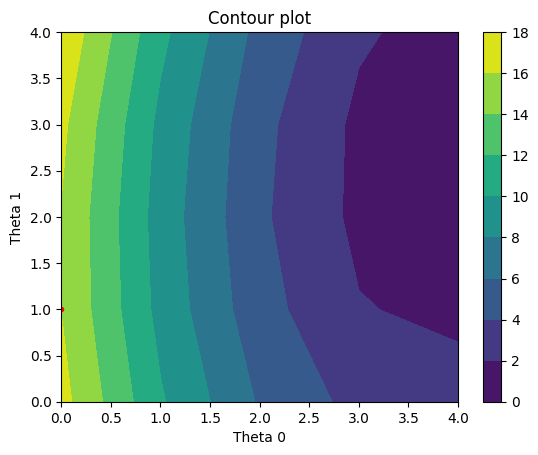

In [90]:
# Full batch Dataset 2 with 50 epochs
theta_0, theta_1, epochs, learning_rate = 0, 1, 50, 0.1
t0lim = [0,4]
t1lim = [0,4]
animation = contour_plot_full_batch(x2, y2, t0lim, t1lim, theta_0, theta_1, epochs, learning_rate, False)

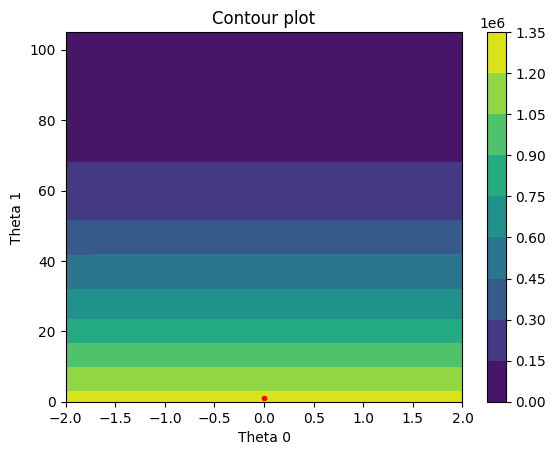

In [222]:
# Full batch Dataset 1 with 50

theta_0, theta_1, epochs, learning_rate = 0, 1, 50, 0.001
t0lim = [-2,2]
t1lim = [0,105]
animation = contour_plot_full_batch(x1, y1, t0lim, t1lim, theta_0, theta_1, epochs, learning_rate, False)

In [56]:
def contour_plot_SGD(X, y, t0lim, t1lim, theta_0, theta_1, epochs, learning_rate, momentum, beta = 0):   

    t0 = np.linspace(t0lim[0], t0lim[1], 5)
    t1 = np.linspace(t1lim[0], t1lim[1], 5)
    t0, t1 = np.meshgrid(t0, t1)
    x_flat = X[np.newaxis, np.newaxis, : ]
    broadcasted_t1 = t1[:, : ,np.newaxis]
    broadcasted_t0 = t0[:, : ,np.newaxis]
    y_hat = broadcasted_t0 + broadcasted_t1 * x_flat
    y_flat = y[np.newaxis, np.newaxis, : ]
    z = np.mean((y_flat - y_hat)**2, axis = -1)
    
    fig, ax = plt.subplots()
    # ax.scatter(theta_0,theta_1, color = 'black', marker = '.')

    contour = ax.contourf(t0, t1, z, levels = 10)
    ax.set_xlabel('Theta 0')
    ax.set_ylabel('Theta 1')
    ax.set_title(f'Contour plot: learning rate {learning_rate} , epochs: {epochs}')
    plt.colorbar(contour)

    i, e = 0, 0
    y_pred = np.zeros(len(X))
    m, n = [], []
    history_0, history_1 = 0, 0

    def animate(frames):
        nonlocal theta_0, theta_1, i, e, history_0, history_1

        m.append(theta_0)
        n.append(theta_1)
        # print(f'at i: {i} Theta_0: {theta_0}, Theta_1: {theta_1}')
       
        # ax.text(theta_0, theta_1, f"({theta_0:.2f},{theta_1:.2f})",color = 'white')
        sc = ax.plot(m, n, color = 'red')
        y_pred[i] = theta_0 + theta_1 * X[i]

        grad_theta_0 = -2*(y[i] - y_pred[i])
        grad_theta_1 = -2*(y[i] - y_pred[i])*X[i]
        ax.set_title(f'Contour plot: lr: {learning_rate} , epochs: {e}/{epochs}, ({theta_0:.2f},{theta_1:.2f}), Gradients: ({grad_theta_0:.2f}, {grad_theta_1:.2f})')

        if momentum == True:
            history_0 = beta * history_0 + grad_theta_0
            history_1 = beta * history_1 + grad_theta_1
            theta_0 = theta_0 - learning_rate * history_0
            theta_1 = theta_1 - learning_rate * history_1
        else:
            theta_0 = theta_0 - learning_rate * grad_theta_0
            theta_1 = theta_1 - learning_rate * grad_theta_1

        i = (i + 1) % len(X)
        if i == 0:
            e = e + 1

        return (sc,)

    num_frames = epochs * len(X)

    animation = FuncAnimation(fig, animate, frames=num_frames, interval=500)  
    
    return animation 

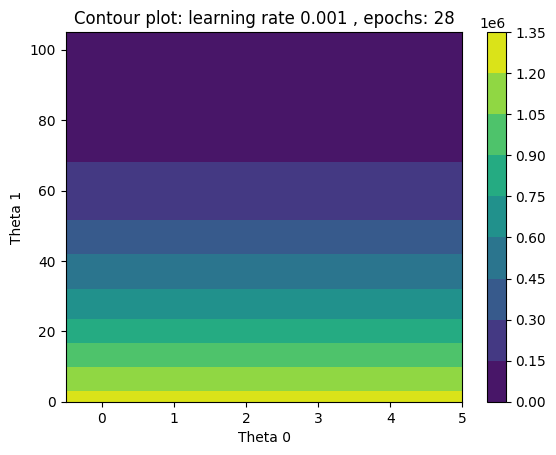

In [229]:
# SGD dataset 1 
theta_0, theta_1, epochs, learning_rate = 0, 1, 28, 0.001
t0lim = [-0.5, 5]
t1lim = [0, 105]
animation = contour_plot_SGD(x1, y1, t0lim, t1lim, theta_0, theta_1, epochs, learning_rate, False)

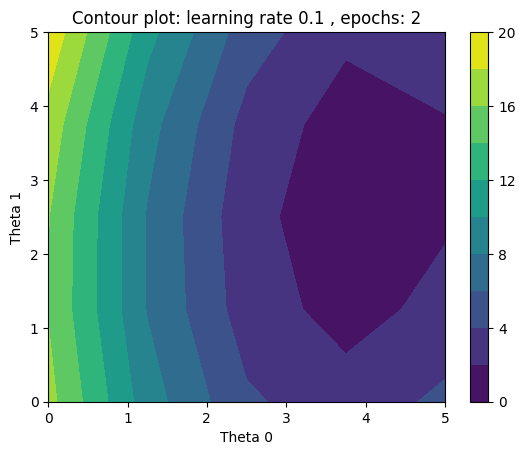

In [227]:
# SGD Dataset 2
theta_0, theta_1, epochs, learning_rate = 0, 1, 2, 0.1
t0lim = [0, 5]
t1lim = [0, 5]
animation = contour_plot_SGD(x2, y2, t0lim, t1lim, theta_0, theta_1, epochs, learning_rate, False)

In [38]:
#Full batch gradient descent with momentum
def full_batch_gradient_descent_momentum(epochs, learning_rate, beta, theta_0, theta_1, x1, y):
    prev_loss = 0
    history_0, history_1 = 0, 0
    diff, loss = [], []
    for i in range(epochs): 

        y_hat = theta_0 + theta_1 * x1
        curr_loss = np.sum((y-y_hat)**2) / len(x1)
        # print(f'Loss is {curr_loss}')
        # print(f'Absolute Difference in previous and current loss {abs(prev_loss - curr_loss)}')

        grad_theta_0 = np.sum(-2*(y - y_hat)) / len(x1)
        grad_theta_1 = np.sum(-2*(y - y_hat)*x1) / len(x1)
        # print(f'grad_Theta_0 is {grad_theta_0} and grad_Theta_1 is {grad_theta_1}')

        history_0 = beta * history_0 + grad_theta_0
        theta_0 = theta_0 - learning_rate * history_0

        history_1 = beta * history_1 + grad_theta_1
        theta_1 = theta_1 - learning_rate * history_1
        # print(f'Theta_0 is {theta_0} and Theta_1 is {theta_1}')

        loss.append(curr_loss)
        diff.append(abs(prev_loss - curr_loss))
        if (abs(prev_loss - curr_loss) < 0.001):
            print(f'Gradient Descent Converged at Epoch {i+1}')
            # break

        prev_loss = curr_loss

    print(f'Theta_0 is {theta_0} and Theta_1 is {theta_1} at epoch {i+1}')
    return diff, loss

Dataset 1
Gradient Descent Converged at Epoch 715
Gradient Descent Converged at Epoch 716
Gradient Descent Converged at Epoch 717
Gradient Descent Converged at Epoch 718
Gradient Descent Converged at Epoch 719
Gradient Descent Converged at Epoch 720
Theta_0 is 0.4724763828681524 and Theta_1 is 99.97766181064634 at epoch 720
Dataset 2
Gradient Descent Converged at Epoch 39
Gradient Descent Converged at Epoch 40
Theta_0 is 3.9352208973485125 and Theta_1 is 2.5563047080054884 at epoch 40


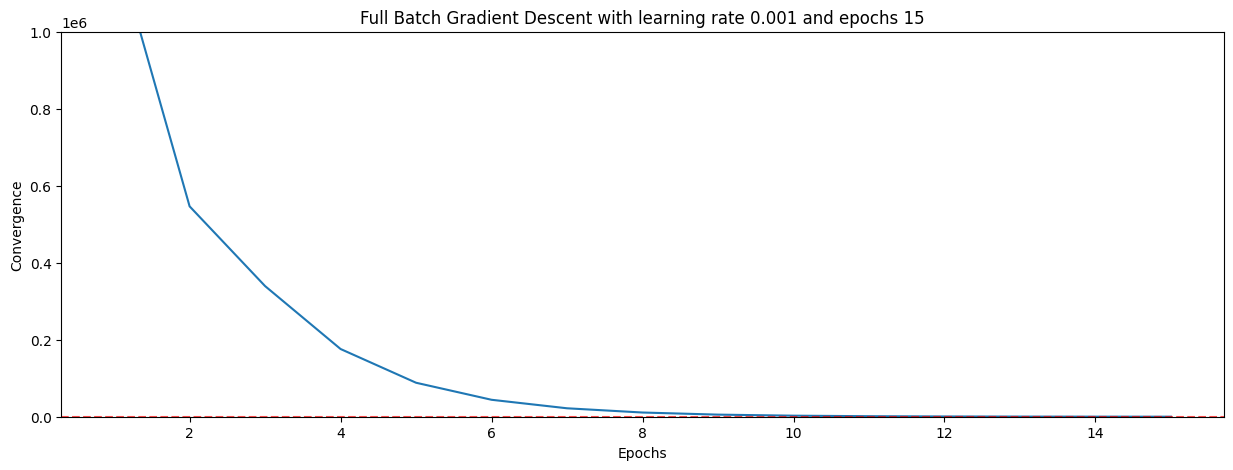

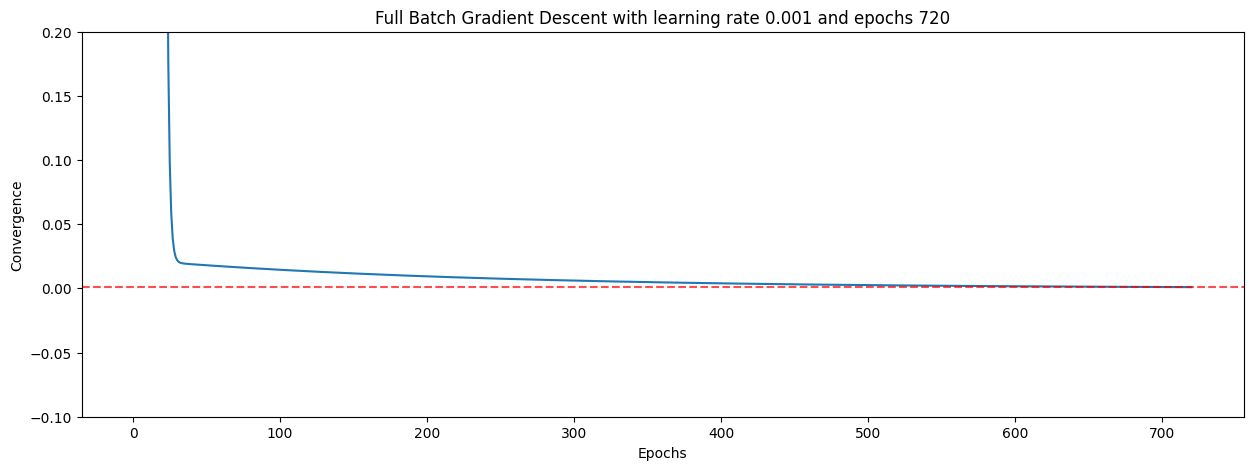

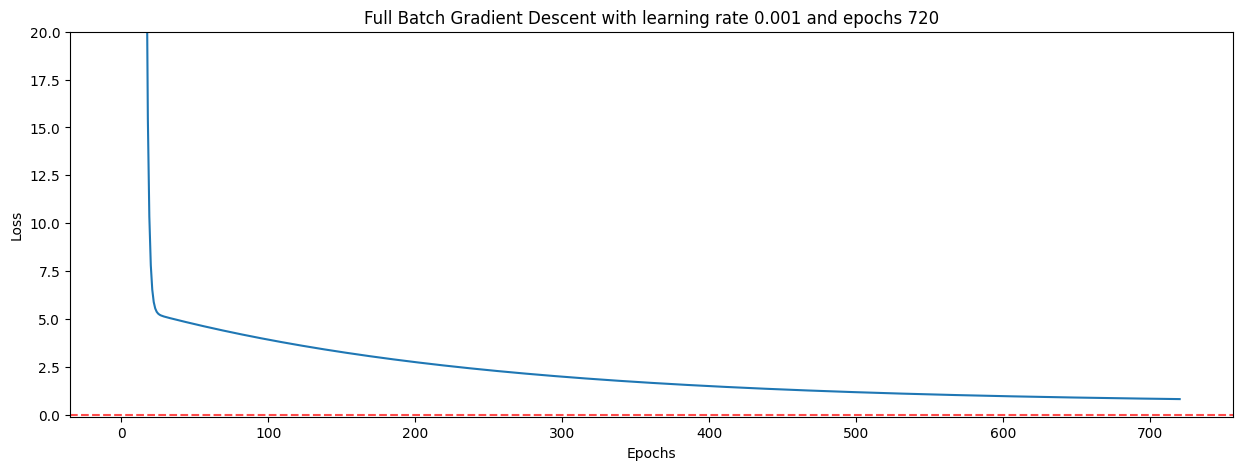

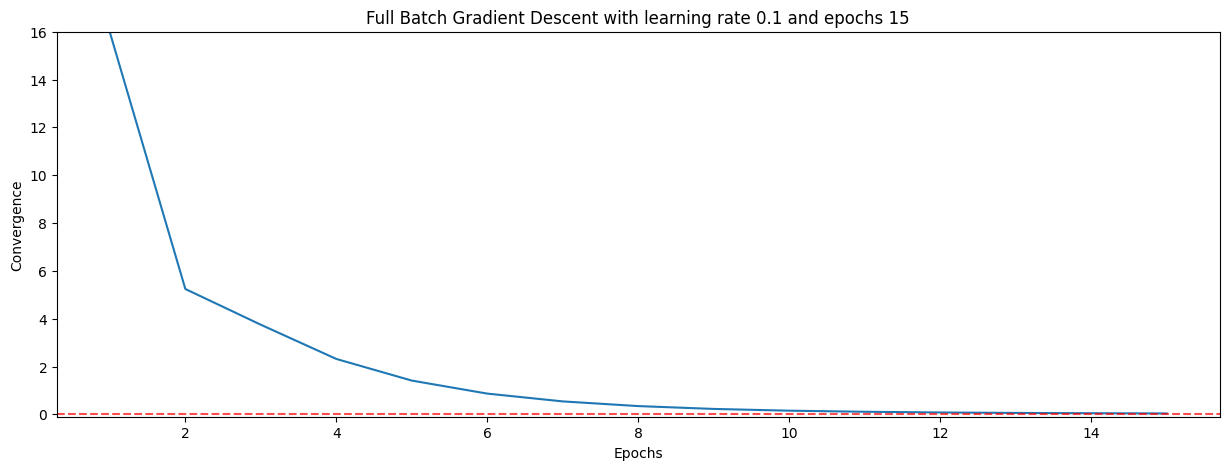

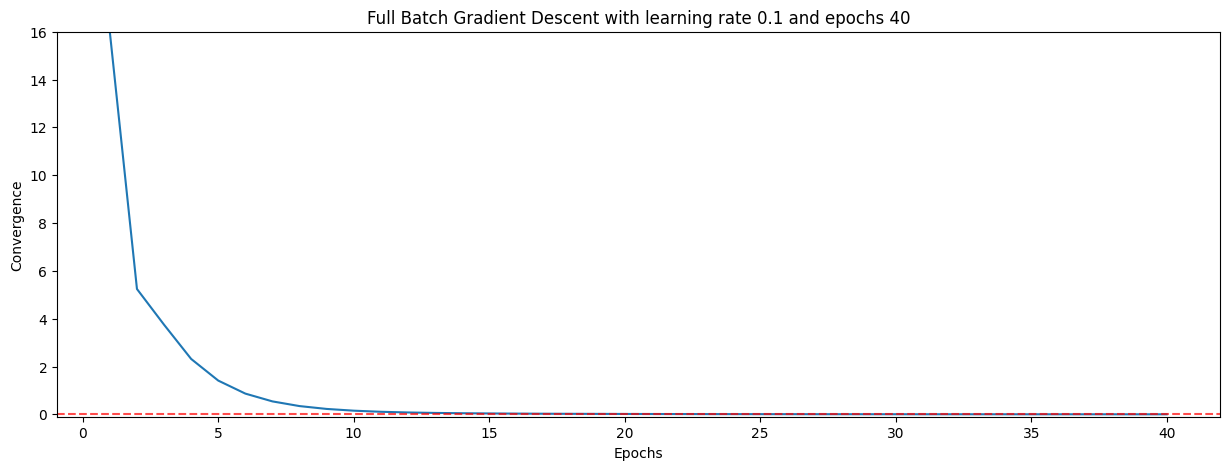

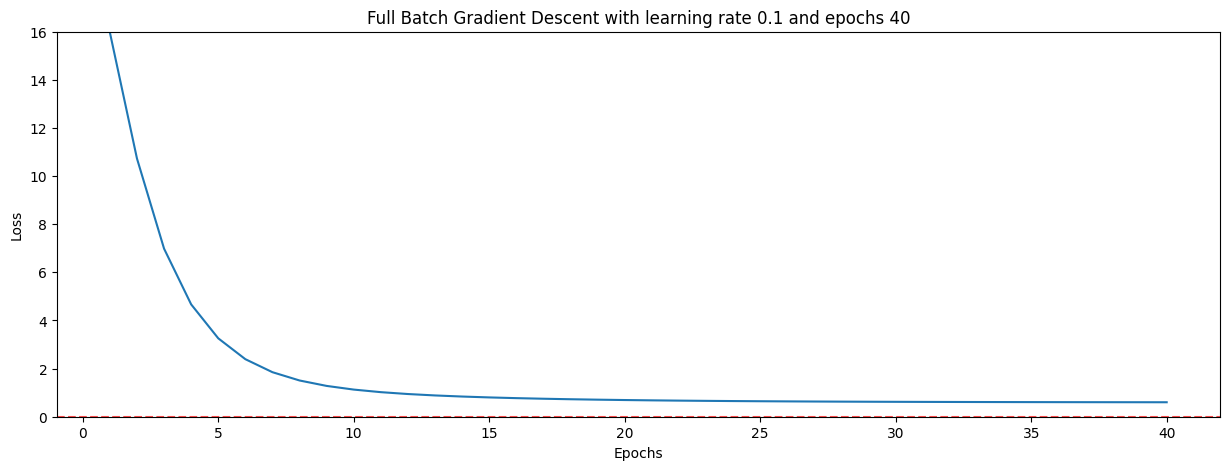

In [39]:
print('Dataset 1')
# Full Batch Gradient Descent for dataset 1
diff, loss = full_batch_gradient_descent_momentum(720, 0.001, 0.1, 0, 1, x1, y1)

# visualize convergence process for 15 epochs
ylim = [0, 1e6]
visualisation(diff, 15, 0.001,'Full Batch Gradient Descent', len(x1), ylim)

# visualize convergence process for 720 epochs
ylim = [-0.1, 0.2]
visualisation(diff, 720, 0.001,'Full Batch Gradient Descent', len(x1), ylim)

# # visualize loss v/s epochs
# ylim = [0, 1e6]
ylim = [-0.1, 20]
visualisation_loss(loss, 720, 0.001,'Full Batch Gradient Descent', len(x1), ylim)

# Full Batch Gradient Descent for dataset 2
print('Dataset 2')

diff, loss = full_batch_gradient_descent_momentum(40, 0.1, 0.1, 0, 1, x2, y2)

# visualize convergence process for 15 epochs
ylim = [-0.1, 16]
visualisation(diff, 15, 0.1,'Full Batch Gradient Descent', len(x2), ylim)

# visualize convergence process for 40 epochs
ylim = [-0.1, 16]
visualisation(diff, 40, 0.1,'Full Batch Gradient Descent', len(x2), ylim)

# visualize loss v/s epochs
ylim = [0, 16]
visualisation_loss(loss, 40, 0.1,'Full Batch Gradient Descent', len(x2), ylim)

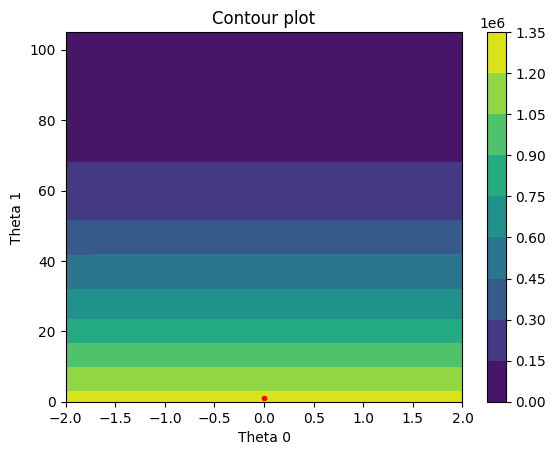

In [257]:
#Contour plot of dataset 1 full batch momentum
theta_0, theta_1, epochs, learning_rate = 0, 1, 720, 0.001
#X, y, t0lim, t1lim, theta_0, theta_1, epochs, learning_rate, momentum, beta = 0
t0lim = [-2,2]
t1lim = [0,105]
animation = contour_plot_full_batch(x1, y1, t0lim, t1lim, theta_0, theta_1, epochs, learning_rate, True, 0.1)

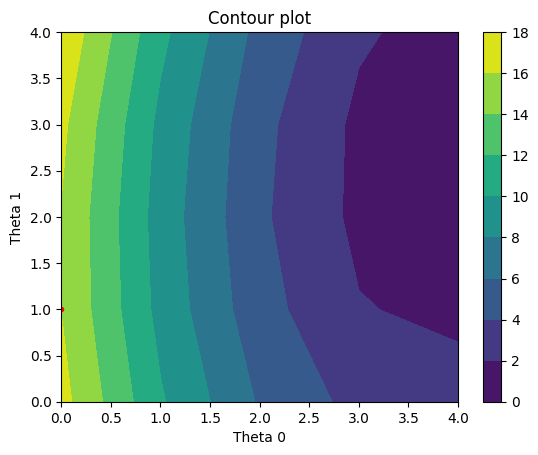

In [259]:
#Contour plot of dataset 2 full batch momentum
# Full batch Dataset 2 with 50 epochs
theta_0, theta_1, epochs, learning_rate = 0, 1, 40, 0.1
t0lim = [0,4]
t1lim = [0,4]
animation = contour_plot_full_batch(x2, y2, t0lim, t1lim, theta_0, theta_1, epochs, learning_rate, False)

In [41]:
#Stochastic Gradient Descent with momentum

def stochastic_gradient_descent_momentum(epochs, learning_rate, beta, theta_0, theta_1, x1, y, y_hat):
    prev_loss = 0
    history_0, history_1 = 0, 0
    flag = 0
    diff, loss = [], []
    for i in range(epochs): 
        conv = 0
        for j in range(len(x1)):
            y_hat[j] = theta_0 + theta_1 * x1[j]
            curr_loss = (y[j]-y_hat[j])**2
            # print(f'Loss is {curr_loss}')
            # print(f'Absolute Difference in previous and current loss {abs(prev_loss - curr_loss)}')

            grad_theta_0 = -2*(y[j] - y_hat[j])
            grad_theta_1 = -2*(y[j] - y_hat[j])*x1[j]
            # print(f'grad_Theta_0 is {grad_theta_0} and grad_Theta_1 is {grad_theta_1}')

            history_0 = beta * history_0 + grad_theta_0
            history_1 = beta * history_1 + grad_theta_1

            theta_0 = theta_0 - learning_rate * grad_theta_0
            theta_1 = theta_1 - learning_rate * grad_theta_1
            # print(f'Theta_0 is {theta_0} and Theta_1 is {theta_1}')

            conv = conv + (abs(prev_loss - curr_loss))
            if (abs(prev_loss - curr_loss) < 0.001):
                flag = 1
                print(f'SGD Converged at step {i*len(x1)+j} and epoch {i+1} and iteration {j+1}')
                # break

            # diff.append(abs(prev_loss - curr_loss))
            # loss.append(curr_loss)
            prev_loss = curr_loss

        diff.append(conv / len(x1))
        loss.append(curr_loss)
        
        if flag == 1:
            # print(f'SGD Converged at Epoch {i+1}')
            # break
            pass

    print(f'Theta_0 is {theta_0} and Theta_1 is {theta_1} at Epoch {i+1}')
    return diff, loss

Dataset 1
SGD Converged at step 1113 and epoch 28 and iteration 34
Theta_0 is 1.1051418132378905 and Theta_1 is 99.9699101553176 at Epoch 30
Dataset 2
SGD Converged at step 73 and epoch 2 and iteration 34
SGD Converged at step 113 and epoch 3 and iteration 34
SGD Converged at step 133 and epoch 4 and iteration 14
SGD Converged at step 153 and epoch 4 and iteration 34
SGD Converged at step 173 and epoch 5 and iteration 14
SGD Converged at step 193 and epoch 5 and iteration 34
Theta_0 is 4.333846447899097 and Theta_1 is 2.733132874038391 at Epoch 5


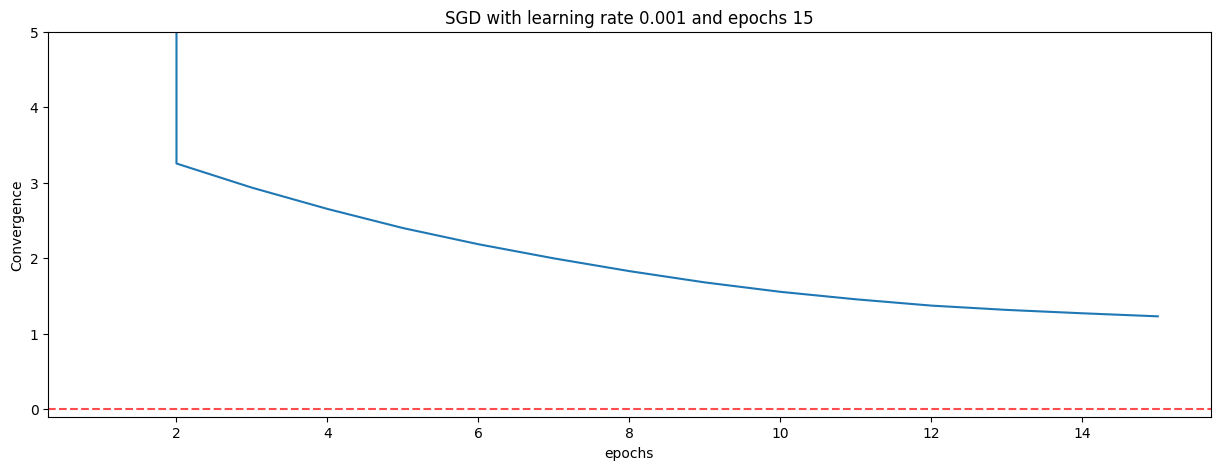

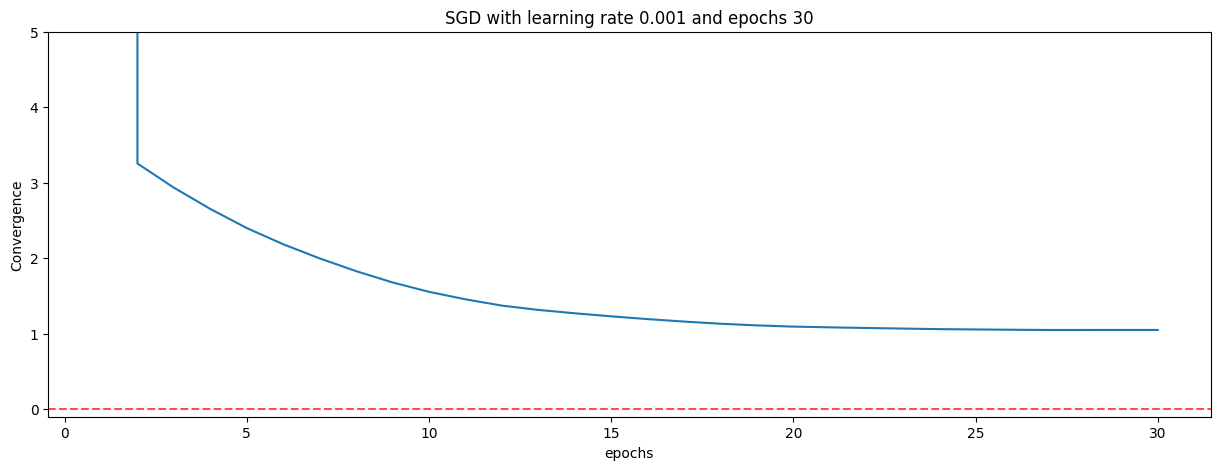

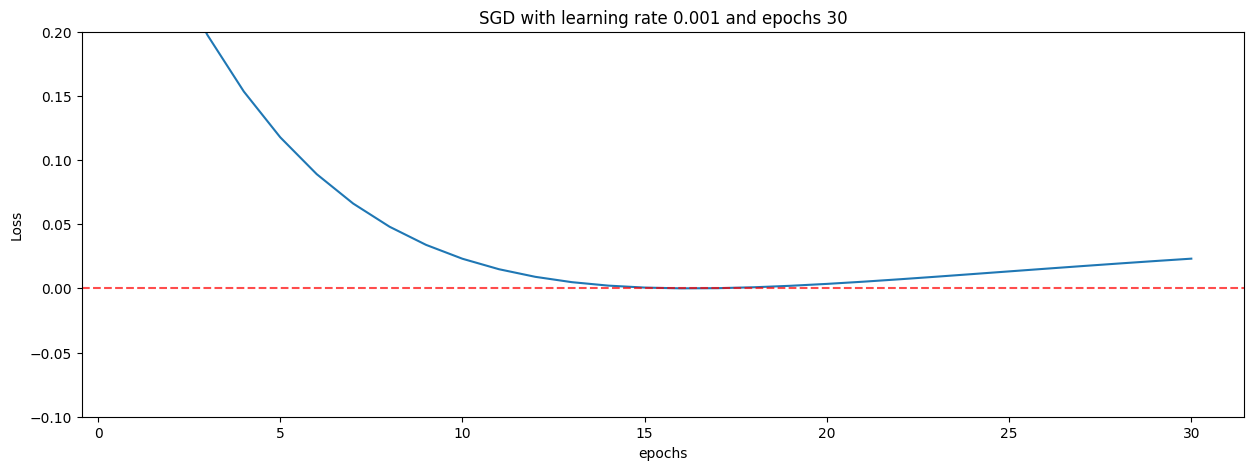

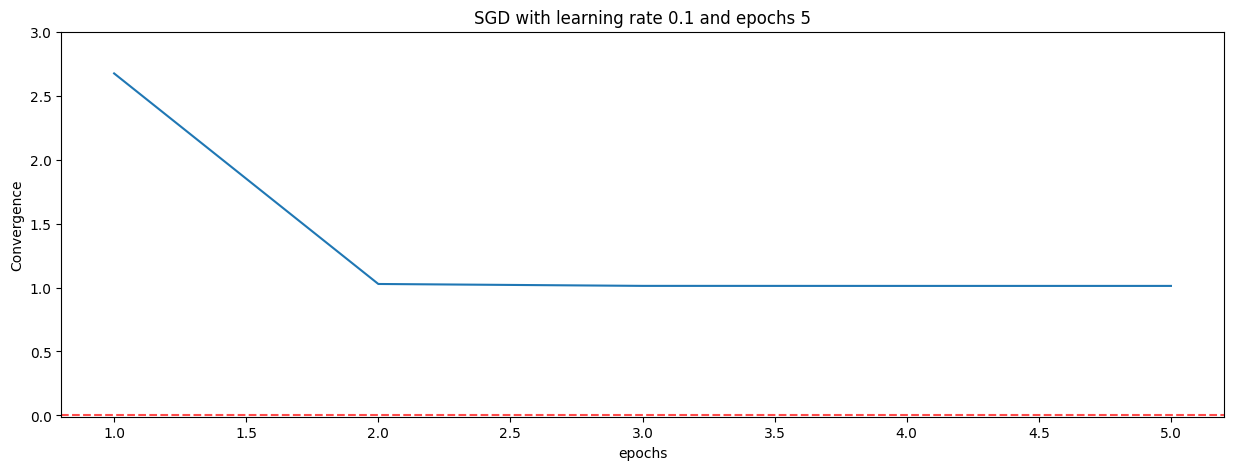

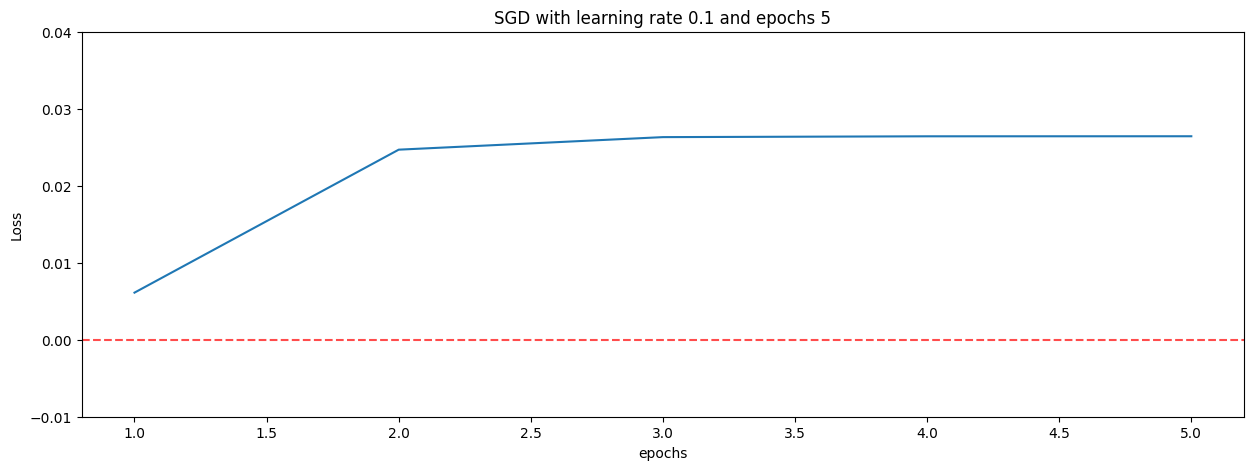

In [42]:
#Stochastic Gradient Descent for dataset 1
y_hat = np.zeros(len(x1))
print('Dataset 1')
diff, loss = stochastic_gradient_descent_momentum(30, 0.001,0.1, 0, 1, x1, y1, y_hat)

# visualize convergence process for 15 epochs
# per iteration
# ylim = [-1, 50]
# per iteration
ylim = [-0.1, 5]
visualisation(diff, 15, 0.001, 'SGD', len(x1), ylim)

# visualize convergence process for 30 epochs
ylim = [-0.1, 5]
visualisation(diff, 30, 0.001, 'SGD', len(x1), ylim)

# visualize loss v/s epochs
# per iteration
# ylim = [-1, 50]
# per iteration
ylim = [-0.1, 0.2]
visualisation_loss(loss, 30, 0.001,'SGD', len(x1), ylim)

#Stochastic Gradient Descent for dataset 2
y_hat = np.zeros(len(x2))
print('Dataset 2')
diff,loss = stochastic_gradient_descent_momentum(5, 0.1,0.1, 0, 1, x2, y2, y_hat)

# visualize convergence process for 15 epochs
# per iteration
# ylim = [0, 20]
# per iteration
ylim = [-0.01, 3]
visualisation(diff, 5, 0.1, 'SGD', len(x2), ylim)

# visualize loss v/s epochs
# per iteration
# ylim = [0, 20]
# per iteration
ylim = [-0.01, 0.04]
visualisation_loss(loss, 5, 0.1,'SGD', len(x2), ylim)

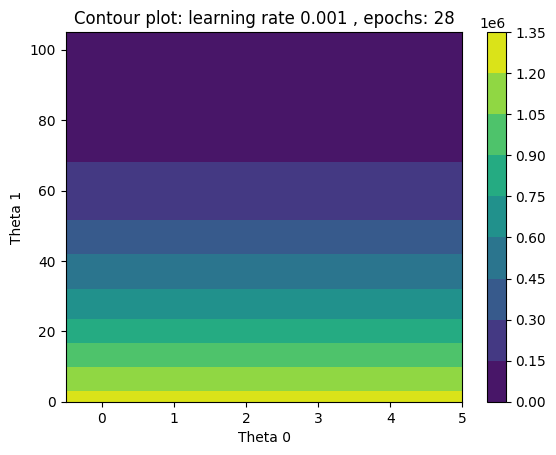

In [294]:
# Dataset 1 SGD 
theta_0, theta_1, epochs, learning_rate = 0, 1, 28, 0.001
t0lim = [-0.5, 5]
t1lim = [0, 105]
animation = contour_plot_SGD(x1, y1,t0lim, t1lim, theta_0, theta_1, epochs, learning_rate, True, 0.1)

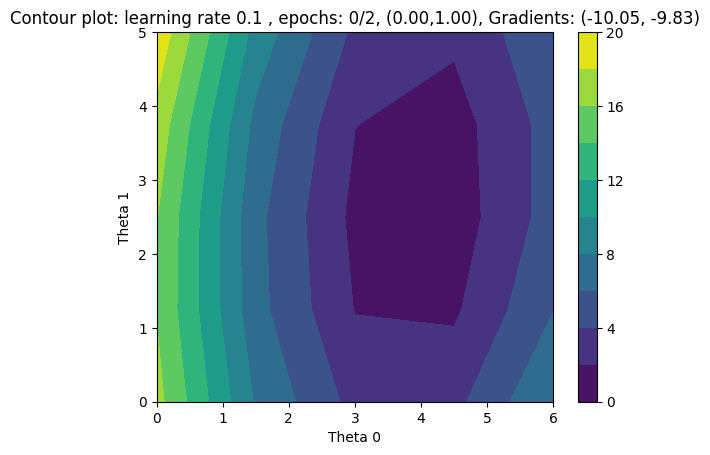

In [57]:
# Dataset 2 SGD 
theta_0, theta_1, epochs, learning_rate = 0, 1, 2, 0.1
t0lim = [0, 6]
t1lim = [0, 5]
animation = contour_plot_SGD(x2, y2, t0lim, t1lim, theta_0, theta_1, epochs, learning_rate, True, 0.1)